In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename='/content/drive/My Drive/DataSet/Lpoint/data/Product.csv'

In [ ]:
prd = pd.read_csv(filename, dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
prd.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,06158159,85,179538,(not set),[아베다],39000,1
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,06406509,78,190306,5개,데코르테,39000,5


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
prd.dtypes
prd.shape

CLNT_ID      object
SESS_ID      object
HITS_SEQ      int64
PD_C          int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM     int64
PD_BUY_CT     int64
dtype: object

(5024906, 8)

### 1.Product 
#### 1.1 Product 내 변수만으로 알아볼 수 있는 것들 
1. 연속형 변수 3개(HITS_SEQ, PD_BUY_AM, PD_BUY_CT)의 각 각의 기술통계
2. PD_BUY_AM * PD_BUT_CT = 총구매가격 변수 추가하여 기술통계
3. 총구매가격과 HITS_SEQ의 상관관계(보통 가격이 높은 상품이 관여도가 높기 때문에 소비 이전에 정보검색량이 많다. 따라서 구매까지의 홈페이지 내 클릭 수를 보여주는 HITS_SEQ과 총구매 가격 간의 상관관계를 본다. H1:많이 살펴볼 수록 총구매가격이 높다.)
4. 생각나면 추가






In [ ]:
prd['TOT_PRICE'] = prd['PD_BUY_AM']*prd['PD_BUY_CT'] #변수 추가
prd.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000


In [ ]:
hit_price_cor = prd[['HITS_SEQ', 'TOT_PRICE']] #또는 prd.loc[;,['HITS_SEQ', 'TOT_PRICE']]
hit_price_cor.head()

,HITS_SEQ,TOT_PRICE
0,12,39000
1,13,78000
2,85,39000
3,12,39000
4,78,195000


In [ ]:
hit_price_cor.corr(method='pearson') #왓더 -0.025

,HITS_SEQ,TOT_PRICE
HITS_SEQ,1.000000,-0.025467
TOT_PRICE,-0.025467,1.000000


In [ ]:
des = prd[['HITS_SEQ','PD_BUY_AM','PD_BUY_CT','TOT_PRICE']].describe()
pd.options.display.float_format = '{:.2f}'.format #소수점 두번째까지 표시
des

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
count,5024906.00,5024906.00,5024906.00,5024906.00
mean,81.26,51349.45,1.18,54089.34
std,85.94,117383.57,3.07,127671.25
min,1.00,10.00,1.00,10.00
25%,24.00,12900.00,1.00,14000.00
50%,50.00,28000.00,1.00,29000.00
75%,104.00,49900.00,1.00,53000.00
max,500.00,17779000.00,1440.00,39000000.00


In [ ]:
prd[prd['PD_BUY_AM']==17779000] # 1777만 9천원짜리 시계 FLEX
prd[prd['PD_BUY_CT']==1440] #prd['PD_BUY_CT'].idxmax() 몇 번째 행이 최대인지만 나옴.
prd.loc[prd['TOT_PRICE'].idxmax()] #정관장 10만원짜리를 390개를 샀음. 
prd.loc[prd['HITS_SEQ'].idxmax()] #900원짜리 구매하는데 클릭이 500번?

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
3424550,0929827,00609951,57,51344,1개,프레드릭콘스탄트(시계),17779000,1,17779000


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE
29649,3007548,03553431,112,643396,원단선택:91번|손잡이선택:좌측|설치공간:천정목재 / 1440개,리드센스,100,1440,144000


CLNT_ID       0820884
SESS_ID      05051994
HITS_SEQ           47
PD_C             1955
PD_ADD_NM        390개
PD_BRA_NM         정관장
PD_BUY_AM      100000
PD_BUY_CT         390
TOT_PRICE    39000000
Name: 2479620, dtype: object

CLNT_ID                 4598302
SESS_ID                01328757
HITS_SEQ                    500
PD_C                     460049
PD_ADD_NM    색상/사이즈:그린/100 / 1개
PD_BRA_NM                   포인포
PD_BUY_AM                   900
PD_BUY_CT                     1
TOT_PRICE                   900
Name: 6223, dtype: object

In [ ]:
# 11.8 히스토그램 정규화해서 시각화 좀 제대로. 표로는 한 눈에 안들어옴. 
# Standardization using zscore() of scipy.stats 
import scipy.stats as ss
data_standadized_ss = ss.zscore(prd['PD_BUY_AM'])
data_standadized_ss

# Using numpy, z = (x-mean)/std 
#from numpy import *
#data_standadized_np = (prd['PD_BUY_AM'] - mean(prd['PD_BUY_AM'], axis=0)) / std(prd['PD_BUY_AM'], axis=0)
#data_standadized_np
#mean(data_standadized_np, axis=0)
#std(data_standadized_np, axis=0)

# sklearn.preprocessing 을 이용한 표준화 : StandardScaler().fit_transform()
# from sklearn.preprocessing import StandardScaler
# ata_standadized_skl = StandardScaler().fit_transform(data)
# data_standadized_skl

#출처 https://rfriend.tistory.com/tag/standardization

array([-0.10520598, -0.10520598, -0.10520598, ..., -0.10520598,
       -0.10520598, -0.10520598])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


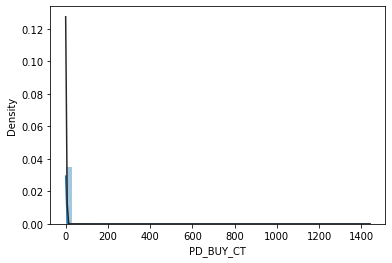

In [ ]:
# 히스토그램 그릴 때는 위와 같이 굳이 표준화 거칠 필요 없음. 
#from scipy.stats import norm
s#ns.distplot(prd['PD_BUY_CT'], fit=norm)
#plt.show()
#아이 씨팔 너무 한 두개 구매에 몰려있음. 1~2개 구매가 전체 구매의 몇 퍼센트를 차지하는지 그냥 수치 보여주는게 더 좋을 듯
#출처 https://seaborn.pydata.org/generated/seaborn.distplot.html

In [ ]:
from collections import Counter 
cnt_PBA = Counter(prd['PD_BUY_AM'])
cnt_PBA.most_common(10)
# 역시 가격은 9, 5가 많이 들어가는듯 
# 9 -> 10-1=9, 100-1=99와 같이 마지막 조금만 빼도 첫째 자리수가 달라지기 때문에 생각보다 할인을 많이한 기분
# 5 -> 인간의 손가락, 발가락 모두 한 쪽 당 5개 단위임. 셈을 할 때 5단위가 깔끔해보이는게 직관적(뇌피셜)
# 근데 비슷한 품목인데 9500원이 9400원보다 잘 팔리는지는 온라인이든 오프라인이든 실시간으로 심리실험해봐야함. 
# 본 데이터에서는 비슷한 품목 두 개 중 어느 것이 더 잘 팔렸는지를 알아보는 것은 어렵다. 외생변수(외부 정보탐색 가능성, 또 외부 정보탐색 후 접속 전 구매결정 여부 등) 통제 안됨. 또 실험집단의 구성에도 문제. 

[(9900, 98237),
 (39000, 94571),
 (10000, 89746),
 (29000, 85759),
 (15000, 82161),
 (19000, 76530),
 (30000, 67577),
 (49000, 61942),
 (35000, 58117),
 (19900, 53908)]

In [ ]:
cnt_PBC = Counter(prd['PD_BUY_CT'])
cnt_PBC.most_common(20)
# 구매 수량의 빈도를 기준으로 20위까지 나열했을 때 1~20개의 빈도가 대부분일 줄 알았는데 1~16까지 있고 17, 18, 19개가 순위에 들지 못했다. 
# 10위까지로 범위를 더 줄여보면 1~5개까지는 순서대로 가고 10개를 산 경우가 6, 7, 8개를 산 경우 보다 많다. 9개를 산 경우는 아예 10위권에 들지도 못함. 
# 5개 이상은 5 또는 10개 단위로 구매하는 것을 선호하는 경향이 손가락, 발가락 개수 때문이라는건 아직까지 내 뇌피셜이기 때문에 연구결과 한 번 찾아봐야함. 
# 또 가격, 품목의 영향을 받았을 가능성이 농후하다. 

[(1, 4676575),
 (2, 225930),
 (3, 58163),
 (4, 19915),
 (5, 19352),
 (10, 6953),
 (6, 5554),
 (7, 2237),
 (8, 1798),
 (20, 1626),
 (15, 950),
 (12, 805),
 (30, 676),
 (9, 576),
 (11, 386),
 (50, 268),
 (14, 247),
 (25, 220),
 (13, 219),
 (16, 213)]

### 1.Product_2
#### 1.2 Product와 join할 수 있는 것들 
##### Access를 통해 쿼리를 쉽게 짜면서 꿀빨려고 했으나 이렇게 큰 데이터셋은 감당이 되지 않아 빨리 SQL을 조금이라도 배워서 하지 않는 이상 파이썬으로 해야할 듯. 

1. Product*Master : PD_C 기준으로 병합이 가능함. 품목별 구매 가격과 양, Hit 수 등을 알 수 있음. 
2. Product*Custom : CLNT_ID 기준으로 병합이 가능함. 구매 이력에 더해 고객에 대한 정보를 더 상세하게 할 수 있음. 
3. Product*Session : CLNT_ID, SESS_ID 
4. Product^Search1 : 


In [ ]:
mastercsv='/content/drive/My Drive/DataSet/Lpoint/data/Master.csv'
master = pd.read_csv(mastercsv)



##### 1. Product*Master
###### 대분류(CLAC1_NM)도 37개나 되기 때문에 줄일 필요가 있다.

In [ ]:
#11.9
#어떤 기준으로 대대분류를 추가하면 좋을지 찾아봐야함. 네이버 쇼핑도 좋은데 더 공식적인 것이면 좋을 것 같음. 
#

In [ ]:
# Product와 Master의 병합
prdmaster = pd.merge(prd,master[["PD_C", "CLAC1_NM"]],on=['PD_C'],how='left')
prdmaster.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,TOT_PRICE,CLAC1_NM
0,4139680,07605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000,화장품/뷰티케어
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000,스포츠패션
2,4142395,06158159,85,179538,(not set),[아베다],39000,1,39000,퍼스널케어
3,4144914,07935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000,유아동의류
4,4144917,06406509,78,190306,5개,데코르테,39000,5,195000,화장품/뷰티케어


In [ ]:
#행 변화 없음
prd.shape
prdmaster.shape

(5024906, 9)

(5024906, 10)

In [ ]:
#대분류에 따른 구매이력
prdmaster['CLAC1_NM'] = prdmaster['CLAC1_NM'].astype('category')
clntbyclac1 = pd.DataFrame(prdmaster[['CLAC1_NM','CLNT_ID']].groupby(['CLAC1_NM']).count())
clntbyclac1['CLNT_ID'].sum() #본 데이터셋에서 총 구매 빈도(이력)은 502만 4906번 
clntbyclac1['PER'] =(clntbyclac1['CLNT_ID']/5024906)*100
clntbyclac1.sort_values(by='PER', ascending=False)


5024906

,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


In [ ]:
#위에서 CLNT_ID와 CLAC1이 groupby했는데 구매이력이라고 한 이유는? 
#Product 데이터셋은 기본적으로 구매이력을 나타낸 것이다. 따라서 CLNT_ID에도 중복된 값이 많다. -> 그래서 무작정 기본키로 활용할 수 없음. 
#
len(prdmaster['CLNT_ID'].unique()) #회원수

In [ ]:
clntbyclac1.sort_values(by='PER', ascending=False)
#여성 의류와 화장품/뷰티케어가 TOP2. 
#그러나 여러 번 구매한 것이 많은 매출을 차지하는 것은 아니다. 


,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


In [ ]:
#대분류별 매출액
totpricebyclac1 = pd.DataFrame(prdmaster[['CLAC1_NM','TOT_PRICE']].groupby(['CLAC1_NM']).sum())
totpricebyclac1['PER'] =(totpricebyclac1['TOT_PRICE']/(prd['TOT_PRICE'].sum()))*100
totpricebyclac1.sort_values(by='PER', ascending=False).head(10) #대분류별 주문 빈도 Top10
clntbyclac1.sort_values(by='PER', ascending=False).head(10) #대분류별 주문 빈도 Top10



,TOT_PRICE,PER
CLAC1_NM,,
패션잡화,44870368961,16.51
여성의류,34140463488,12.56
스포츠패션,30148248820,11.09
화장품/뷰티케어,30086830526,11.07
남성의류,18457045085,6.79
가구,12399026355,4.56
건강식품,10762419216,3.96
유아동의류,9951995610,3.66
생활/주방가전,9946383503,3.66


,CLNT_ID,PER
CLAC1_NM,,
여성의류,677199,13.48
화장품/뷰티케어,574033,11.42
스포츠패션,564355,11.23
남성의류,554910,11.04
패션잡화,449032,8.94
속옷/양말/홈웨어,417473,8.31
유아동의류,341572,6.80
시즌스포츠,150424,2.99
출산/육아용품,141512,2.82


,CLNT_ID,PER
CLAC1_NM,,
가구,16.00,16.00
건강식품,27.00,27.00
계절가전,9.00,9.00
과일,11.00,11.00
구기/필드스포츠,14.00,14.00
남성의류,34.00,34.00
냉동식품,7.00,7.00
냉장/세탁가전,4.00,4.00
냉장식품,8.00,8.00


In [ ]:
len(prd['CLNT_ID'].unique()) #

922737

In [ ]:
customcsv='/content/drive/My Drive/DataSet/Lpoint/data/Custom.csv'
custom = pd.read_csv(customcsv, dtype={"CLNT_ID": np.str})

In [ ]:
srchcsv='/content/drive/My Drive/DataSet/Lpoint/data/Search1.csv'
search1 = pd.read_csv(srchcsv, dtype={"CLNT_ID":np.str, "SESS_ID":np.str})

srch2csv='/content/drive/My Drive/DataSet/Lpoint/data/Search2.csv'
search2 = pd.read_csv(srch2csv)

In [ ]:
sessioncsv='/content/drive/My Drive/DataSet/Lpoint/data/Session.csv'
session = pd.read_csv(sessioncsv, dtype={"CLNT_ID": np.str, "SESS_ID":np.str}, thousands=",")

#11.10 11:00 
지금의 코딩들의 목적은 소비자행돈론의 Term-Paper에 있다. 본 데이터셋에 소비행동 관련 데이터가 많기 때문에 이를 활용해서 교수님께서 요구하신 '실험설계'의 방법론에 적용하고자 하는 것이다. 그러나 실험설계의 방법론들은 데이터를 얻기 위해, 그러니깐 미래에 시행할 실험에 대한 설계를 하는 것인 반면에 이 데이터셋은 이미 로그가 발생한 것으로 파생변수를 내가 만들지 않는 이상 데이터 측정에 있어서 내가 통제할 수 있는 것이 없다. 
또 요즘 이루어지는 보통 빅데이터의 탐색적인 연구와 달리 연구목적을 먼저 정해야 실험설계방법론이 적용 가능한지 판단이 설텐데 뚜렷한 연구목적 역시 아직 존재하지 않는다. 따라서 아래 두 가지 질문에 대해 먼저 답할 수 있어야 데이터셋 탐색이 유의미해질 것이다. 
 

*   6개의 데이터셋 중에 실험자가 연구를 위해 조작했다고 볼 수 있는 변수가 무엇인가? 그러니깐 자동 로그 기록이긴 하나 "사실 실험자가 연구를 위해 조작한 것이랍니다"라는 개구라 같은 가정을 둘 수 있는 변수

*   그것이 있다면 비슷한 선행연구가 있는가? 
